## Observations and Insights 

In [73]:
%matplotlib notebook

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice.
count_mice = merge_df["Mouse ID"].nunique()
count_mice

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merge_df.loc[merge_df['Mouse ID'] == "g989"]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(["g989"]) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
meds = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stds = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sems = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df["Mean of Tumor Volume (mm3)"] = means
stats_df["Median of Tumor Volume (mm3)"] = meds
stats_df["Variance of Tumor Volume (mm3)"] = var
stats_df["Standard Deviation of Tumor Volume (mm3)"] = stds
stats_df["SEM of Tumor Volume (mm3)"] = sems



stats_df


,Mean Tumor Volume (mm3),Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,,
Capomulin,40.675741,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_snd_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
clean_snd_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



<IPython.core.display.Javascript object>


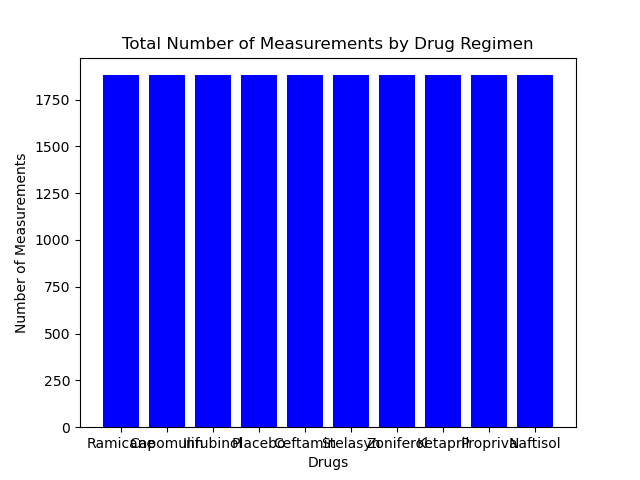

In [99]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = clean_df['Drug Regimen']
measurements = clean_df['Tumor Volume (mm3)'].count()
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Number of Measurements")
x_axis = np.arange(len(drugs))


plt.bar(drugs, measurements, color="b", align="center")

plt.savefig("../barchartpyplot.png")
plt.show()

In [109]:
female_count = clean_df.loc[clean_df["Sex"] == "Male"].nunique()
female_count


Mouse ID              125
Drug Regimen           10
Sex                     1
Age_months             24
Weight (g)             14
Timepoint              10
Tumor Volume (mm3)    834
Metastatic Sites        5
dtype: int64

In [115]:
male_count = clean_df.loc[clean_df["Sex"] == "Female"].nunique()
male_count

Mouse ID              123
Drug Regimen           10
Sex                     1
Age_months             24
Weight (g)             14
Timepoint              10
Tumor Volume (mm3)    800
Metastatic Sites        5
dtype: int64

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ["", 'blue']
sizes = [125, 123]
explode = (0.1, 0, 0, 0)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
